<a href="https://colab.research.google.com/github/JanakiRaman-2002/Machine-Learning/blob/main/NLP_spamMessageAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
for mess_no,message in enumerate(messages[:10]):
  print(mess_no,message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [13]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.groupby('label').describe()

In [16]:
messages['length'] = messages['message'].apply(len)

In [17]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

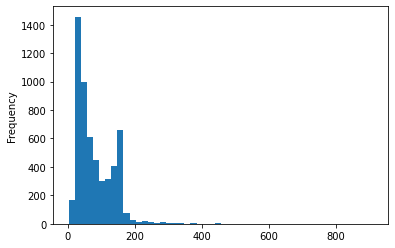

In [19]:
messages['length'].plot.hist(bins=50)

In [21]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [23]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc230a08730>,
      dtype=object)

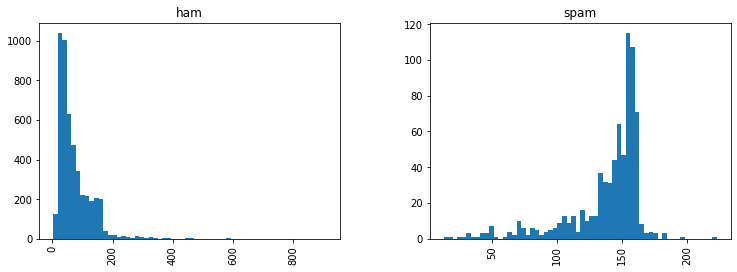

In [25]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [26]:
import string

In [27]:
mess = 'Sample message! Notice: it\'s punctuated.'

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
nopunc = [c for c in mess if c not in string.punctuation]

In [30]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'e',
 'd']

In [31]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

In [33]:
nopunc = ''.join(nopunc)

In [34]:
nopunc

'Sample message Notice its punctuated'

In [35]:
nopunc.split()

['Sample', 'message', 'Notice', 'its', 'punctuated']

In [36]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
clean_mess

['Sample', 'message', 'Notice', 'punctuated']

In [38]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower not in stopwords.words('english')]

In [39]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
messages['message'].head(5).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [43]:
print(len(bow_transformer.vocabulary_))

11747


In [44]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [46]:
bow4 = bow_transformer.transform([mess4])

In [47]:
print(bow4)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [59]:
bow_transformer.get_feature_names_out()[10703]

'then'

In [60]:
messages_bow = bow_transformer.transform(messages['message'])

In [62]:
print("Shape of Sparse Matrix: ", messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11747)


In [63]:
messages_bow.nnz

79463

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer

In [65]:
tfidf_tr = TfidfTransformer().fit(messages_bow)

In [66]:
tfidf4 = tfidf_tr.transform(bow4)

In [67]:
print(tfidf4)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [70]:
tfidf_tr.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [71]:
messages_tfidf = tfidf_tr.transform(messages_bow)

In [72]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [74]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [75]:
messages['label'][3]

'ham'

In [76]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [77]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB())
])

In [84]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fc22fe97a60>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [85]:
predictions = pipeline.predict(msg_test)

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1525
        spam       0.65      1.00      0.79       147

    accuracy                           0.95      1672
   macro avg       0.83      0.97      0.88      1672
weighted avg       0.97      0.95      0.96      1672

